In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
house_df=pd.read_csv("housing/housing.csv")
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
house_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
house_df["population"].nunique()

3888

In [6]:
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


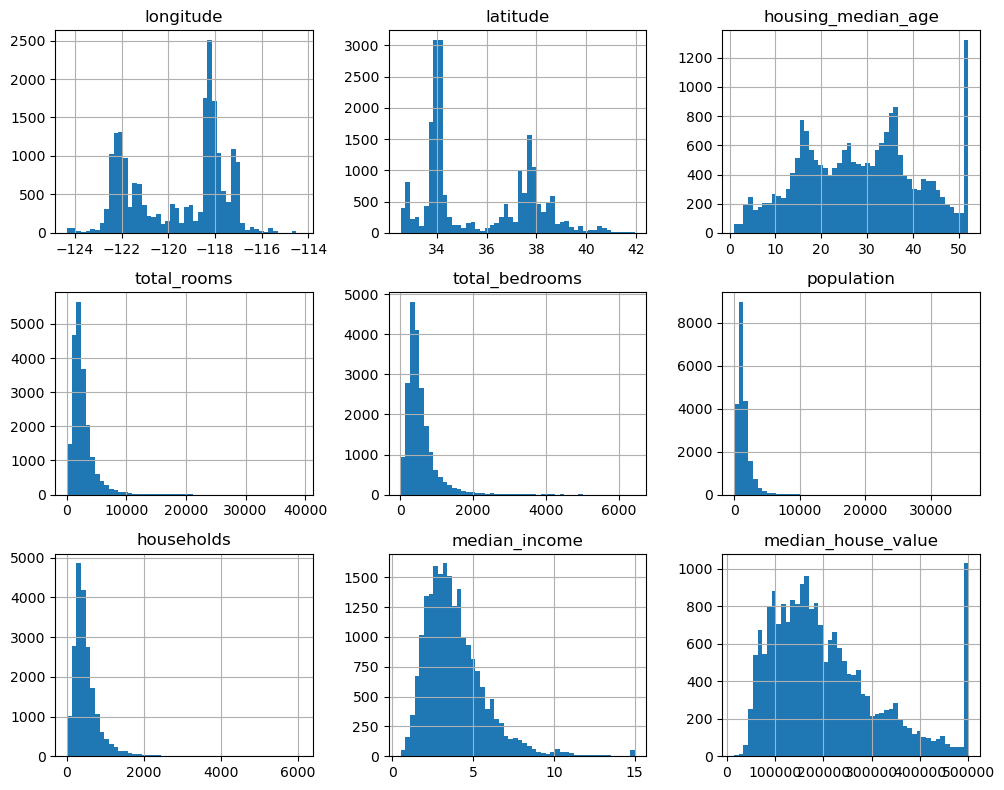

In [7]:
fig, axes = plt.subplots(figsize=(10,8),nrows=3, ncols=3
                        )
house_df.hist(bins=50, ax=axes)
plt.tight_layout()
plt.savefig("plots.png")
plt.show()

# lets see some visualizations

In [8]:
#lets find some hidden insights by comparing the bedroom/room ratio vs 

In [9]:
house_df["total_rooms"].max()

39320.0

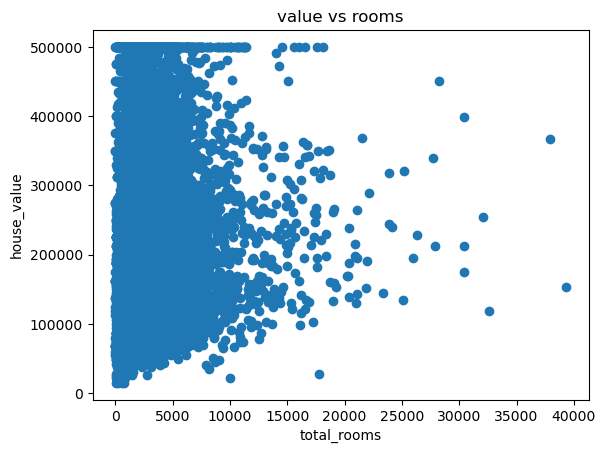

In [10]:
plt.scatter(x=house_df["total_rooms"],y=house_df["median_house_value"])
plt.xlabel("total_rooms")
plt.ylabel("house_value")
plt.title("value vs rooms")
plt.show()

In [11]:
rooms_2=house_df[house_df["total_rooms"]==2]
print(rooms_2.head())

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3126    -117.79     35.21                 4.0          2.0             2.0   

      population  households  median_income  median_house_value  \
3126         6.0         2.0          2.375            137500.0   

     ocean_proximity  
3126          INLAND  


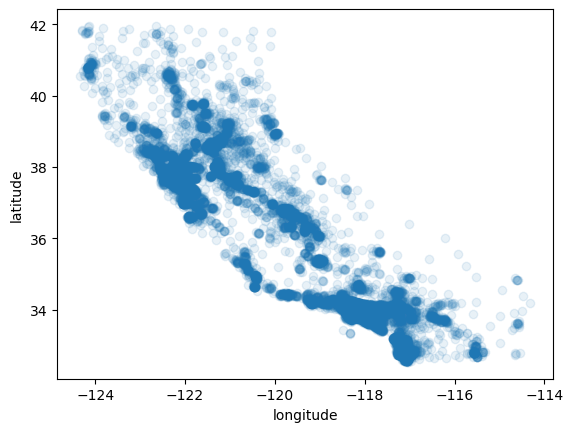

In [12]:
plt.scatter(y=house_df["latitude"],x=house_df["longitude"],alpha=0.1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.savefig("visual1.png")
plt.show()

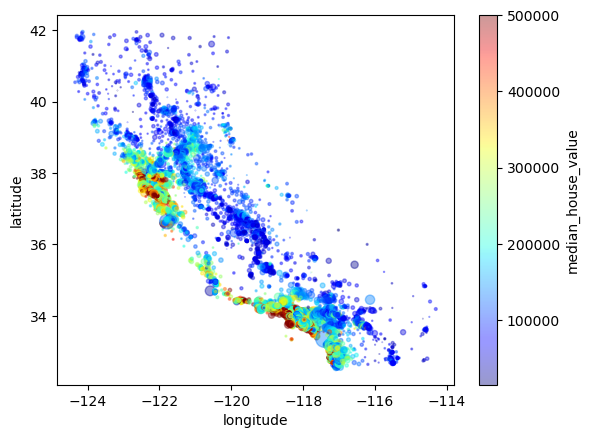

In [13]:
Scatter=plt.scatter(x=house_df["longitude"],y=house_df["latitude"],s=house_df["population"]/250,alpha=0.4,label="population",cmap='jet',c=house_df["median_house_value"])
plt.colorbar(Scatter,label="median_house_value")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

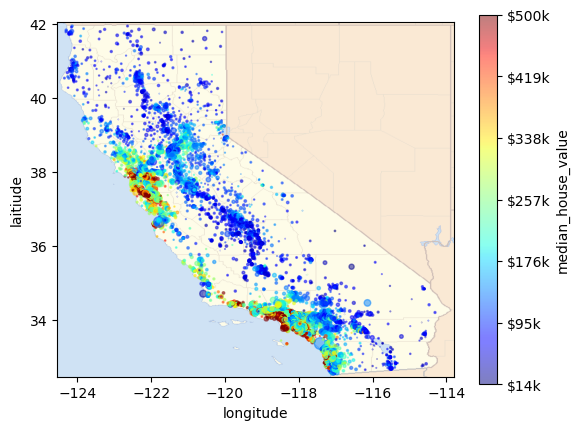

In [38]:
import matplotlib.image as mpimg
cal_img=mpimg.imread("housing/california.png")
Scatter=plt.scatter(x=house_df["longitude"],y=house_df["latitude"],s=house_df["population"]/500,alpha=0.5,cmap='jet',c=house_df["median_house_value"])

cbar=plt.colorbar(Scatter,label="median_house_value")
yticks=np.linspace(house_df["median_house_value"].min(),house_df["median_house_value"].max(),7)
ytickslabels=[f"${int(y/1000)}k" for y in yticks]
#setting the yticks and ylabels
cbar.set_ticks(yticks)
cbar.set_ticklabels(ytickslabels)

plt.imshow(cal_img,extent=[-124.55,-113.8,32.45,42.05],alpha=0.5,cmap='jet')
plt.xlabel("longitude")
plt.ylabel("laitiude")
plt.savefig("visual2.png")
plt.show()

In [37]:
#we want to get the correlations bw the features
temp_housing=house_df.copy()
temp_housing=temp_housing.drop("ocean_proximity",axis=1)
temp_corr=temp_housing.corr()
temp_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

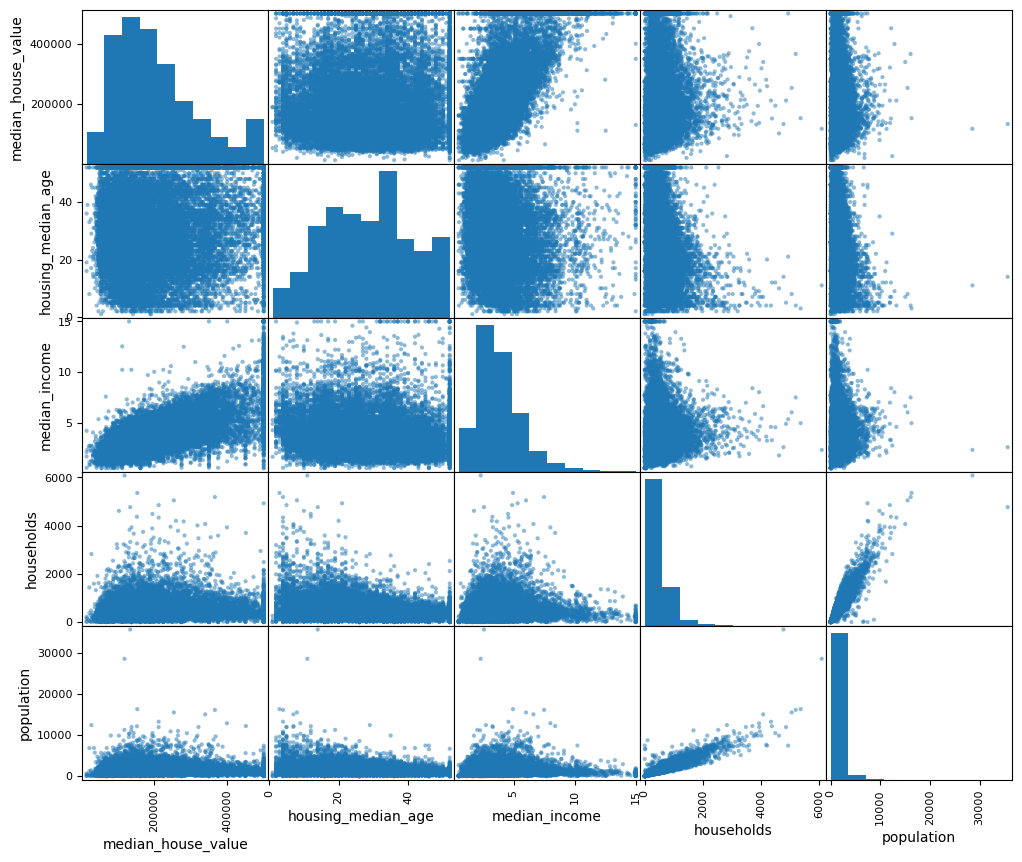

In [43]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","housing_median_age","median_income","households","population"]
scatter_matrix(house_df[attributes],figsize=(12,10))
plt.savefig("scatter_matrix_plot.png")

In [44]:
# experimenting some attributes combinations
house_df["rooms_per_household"]=house_df["total_rooms"]/house_df["households"]
house_df["bedrooms_per_room"]=house_df["total_bedrooms"]/house_df["total_rooms"]
house_df["population_per_household"]=house_df["population"]/house_df["households"]

In [45]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


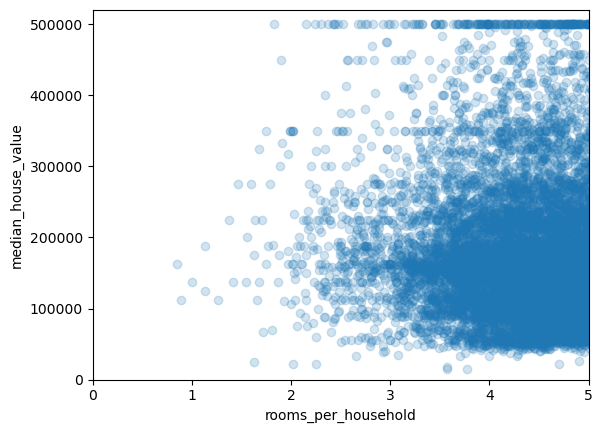

In [49]:
plt.scatter(x=house_df["rooms_per_household"],y=house_df["median_house_value"],alpha=0.2)
plt.xlabel("rooms_per_household")
plt.ylabel("median_house_value")
#plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0, 5, 0, 520000])
plt.show()

In [47]:
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Preparing the data for learning algorithm

In [50]:
house_df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [51]:
house_df=house_df.dropna(axis=1)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   population                20640 non-null  float64
 5   households                20640 non-null  float64
 6   median_income             20640 non-null  float64
 7   median_house_value        20640 non-null  float64
 8   ocean_proximity           20640 non-null  object 
 9   rooms_per_household       20640 non-null  float64
 10  population_per_household  20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [52]:
house_df.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
population_per_household    0
dtype: int64

In [60]:
# handling text and categorical data
house_cat=house_df[["ocean_proximity"]]
house_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [69]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
house_cat_encoded=ordinal_encoder.fit_transform(house_cat)
house_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [71]:
house_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(house_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Custom transformers

In [ ]:
#create custom transformer to add extra attributes

from sklearn.base import BaseEstimator,TransformerMixin
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,X,y=None):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        return np.c[X,rooms_per_household,population_per_household]
        

In [78]:
col_names = "total_rooms", "population", "households"
rooms_ix, population_ix, households_ix = [
    house_df.columns.get_loc(c) for c in col_names] 

In [81]:
households_ix

5